# Steam Games Review Analysis

### The ratings of a product are reflected in the comments or reviews. In the advanced sentiment analysis for the product rating system, comments are analyzed to detect the hidden sentiments. In this case, comments about gaming experience in steam platform will be analyzed.

### Sentiment analysis using machine learning takes the help of a database comprising sentiment-based words that include both positive and negative keywords. 

### The words used in the user comments section is compared to the words contained in the database and an evaluation is made. By comparing with the keywords in the database, the system specifies whether the product is good, bad, or worst.

# 1. Install and Import Necessary Libray For NLP and Sentiment Analysis

In [5]:
# %%capture
# !pip install stopwords
# !pip install flair
# !pip install nltk
# !pip install swifter

In [4]:
import pandas as pd
import numpy as np
# import flair
# from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

# 2. Import Steam Games Review Dataset

### Here i'm just taking 2% of our data to analyze and to be trained.

In [9]:
rn.seed(a=40)
p = 0.02  
review = pd.read_csv('dataset.csv',skiprows=lambda i: i>0 and rn.random() > p)
review.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Graphics is not everything! :) Old school love.,1,1
1,10,Counter-Strike,Played it over 2000hours..woah.. all i can say...,1,0
2,10,Counter-Strike,Think you got skills because you came from CS:...,1,1
3,10,Counter-Strike,"Game of my childhood. It was the year 1998, i...",1,0
4,10,Counter-Strike,Where it all started :) A true classic to the ...,1,0


### Here i'm taking 10% of our data to be used as our model validation.

In [6]:
rn.seed(a=40)
q = 0.1  
review_val = pd.read_csv('dataset.csv',skiprows=lambda i: i>0 and rn.random() > q)
review_val.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,This game saved my virginity.,1,0
1,10,Counter-Strike,Fire in the Hole Simulator 1999,1,0
2,10,Counter-Strike,Best game ever! Started my gaming addiction :D,1,1
3,10,Counter-Strike,'Lock and Load.' 'Go go go!' 'Fire in the hole...,1,0
4,10,Counter-Strike,Nice oldschool game! Counter-Strike is very co...,1,1


In [9]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128153 entries, 0 to 128152
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   app_id        128153 non-null  int64 
 1   app_name      124366 non-null  object
 2   review_text   128004 non-null  object
 3   review_score  128153 non-null  int64 
 4   review_votes  128153 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.9+ MB


In [10]:
review.review_text = review.review_text.astype('str')

### From the both wordclouds of each sentiment above we can see that there are words like "early" or "access" that dominate our review words. We will drop them.

In [15]:
review = review.drop(review[review.review_text == 'Early Access Review'].index)

# 3. Analysis and Visualization

## 3.1. Distribution of Reviews in Each Sentiment

In [11]:
temp = review.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
1,1,104694
0,-1,23459


### We will see the visualization of it.

<AxesSubplot:xlabel='review_score', ylabel='count'>

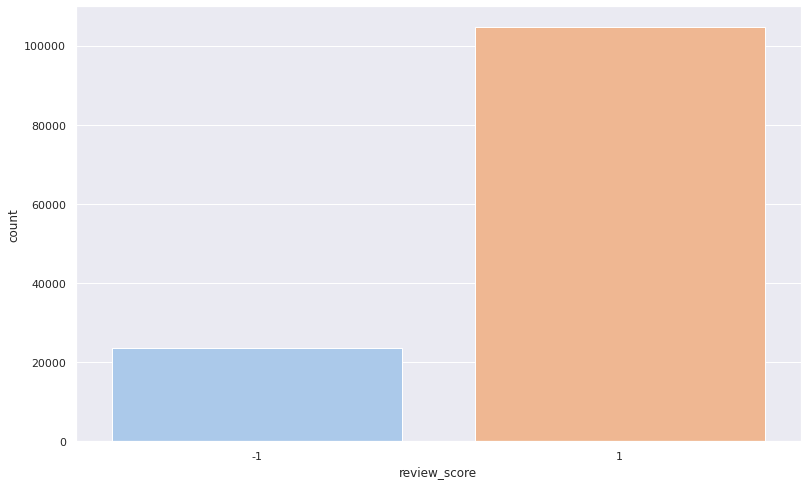

In [12]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='review_score',data=review)

### We can see that there are more positive sentiment reviews than negative sentiment reviews.

## 3.2. WordCloud of Our Review Text

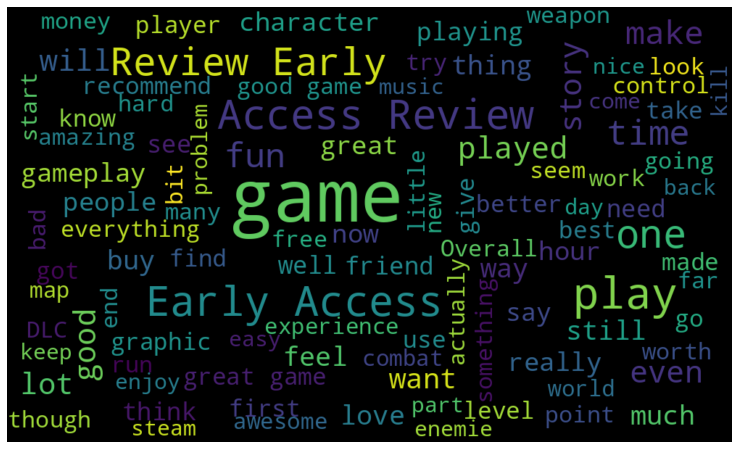

In [13]:
txt = ' '.join(rev for rev in review.review_text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 3.3. WordCloud of Each Sentiment Review Text

In [14]:
positive = review[review['review_score']==1]
negative = review[review['review_score']==-1]

## Positive Sentiment Reviews

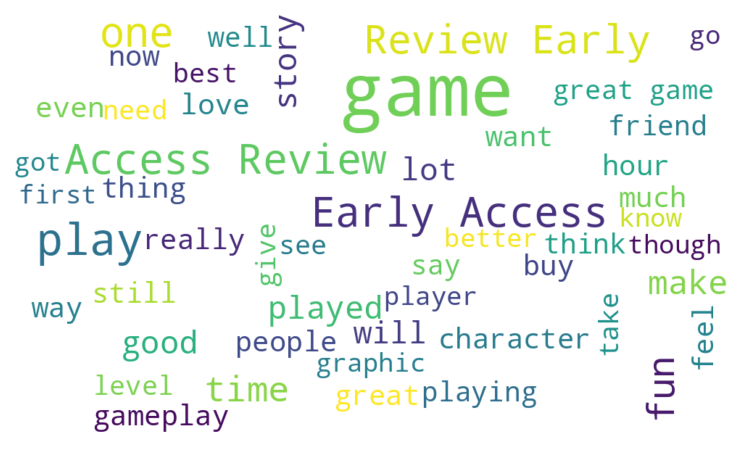

In [15]:
txt = ' '.join(rev for rev in positive.review_text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 50,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### We can see that for postive sentiment review, the most common words are 'good', 'great', 'amazing', 'fun' , etc as shown in picture above.

## Negative Sentiment Reviews

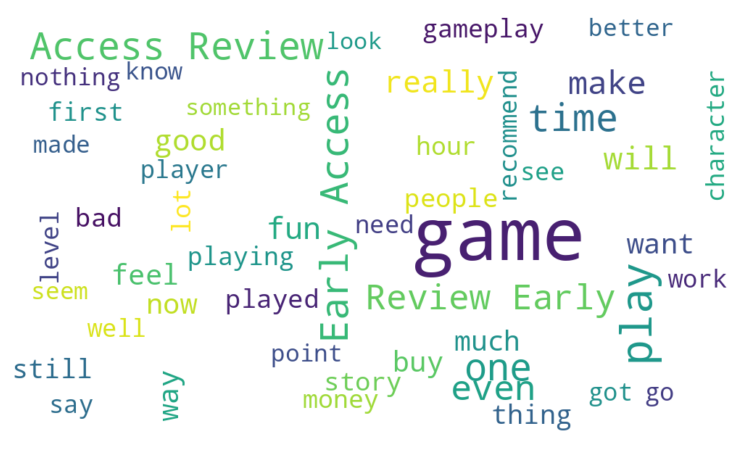

In [16]:
txt = ' '.join(rev for rev in negative.review_text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 50,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### And we can see that for negative sentiment review, the most common words are 'boring', 'worth', 'bad', 'game', etc as shown in picture above. It seems for game review, the reviews are a little bit different than reviews for usable or consumable products or goods.

## 3.4. Distribution of Number of Review Words

### First we create additional features to count number of words in each review text

In [12]:
review_vis = review.copy()

In [13]:
review_vis['Num_word_review'] = review_vis['review_text'].apply(lambda x:len(str(x).split()))

### Than we can plot them

<AxesSubplot:xlabel='Num_word_review', ylabel='Count'>

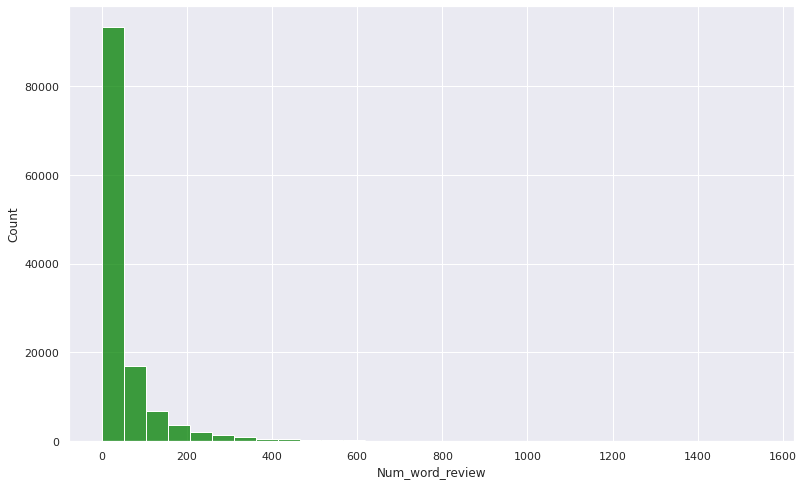

In [20]:
sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='green')

### As we can see that most of our review texts contain 1-200 words.

## 3.5. Distribution of Words in All Review Texts

In [14]:
review_vis['temp_list'] = review_vis['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,276424
1,and,186298
2,a,175388
3,to,174542
4,of,133863
5,is,123576
6,game,113869
7,I,112255
8,you,106759
9,it,85241


### Of course this list still contains stopwords which we have not filtered yet. We will see them later after we filter our review texts.

# 4. Data Cleaning For Sentiment Processing

In [16]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/besmaks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Null values Cleaning

In [17]:
review.isnull().sum()

app_id             0
app_name        3787
review_text        0
review_score       0
review_votes       0
dtype: int64

### But after we've seen that the missing values are only in app name feature, we will ignore them anyway.

### Duplicate Values Removing

In [18]:
review = review.drop_duplicates(keep='first')

In [19]:
review.shape

(109075, 5)

### We make a function to clean some basic characters (RegEx)

In [20]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

### We make function to remove numeric

In [21]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

### We make function to remove emoji

In [22]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

### We make function to unify whitespaces

In [23]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

### We make function to remove symbols

In [24]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

### We make function to remove punctuation

In [25]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

### We make function to remove stopwords

In [26]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

### We make function to use stemming to normalize words

In [27]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

### Then we combine all the cleaning functions

In [28]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [29]:
cleaning(review,'review_text')

In [30]:
review[['review_text']].head(20)

,review_text
0,graphic everyth old school love
1,play hourswoah say isthisi old gold let go eve...
2,think got skill came cs go think got skill cau...
3,game childhood year pentium pc month upgrad dx...
4,start true classic counter strike seri never g...
5,play game year year non steam still amaz fact ...
6,old still best
7,nice game
8,great
9,play awesom game grow oh ya boy miss


### Now all the cleanings are done. We will try to visualize the common words distribution of our review texts. We have done it before but our previous review texts still contain stopwords and punctuations.

In [31]:
review_vis2 = review.copy()

In [32]:
review_vis2['temp_list'] = review_vis2['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,189136
1,play,55324
2,like,39450
3,get,33243
4,one,27061
5,good,26695
6,time,25745
7,fun,24913
8,realli,21775
9,great,21689


### We can plot them

<AxesSubplot:xlabel='count', ylabel='Common_words'>

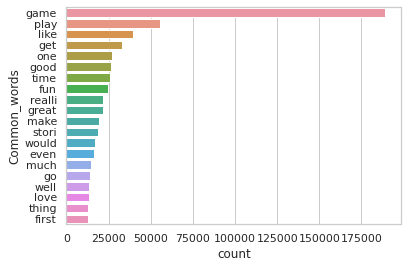

In [33]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

### Then We can see that the word "game" , "play" , "like" are the top 3 common words in our review texts.

# 5. Creating Bag of Words and Text Classifier Model

## 5.1. Creating pipeline for tokenizing and modelling

### Here i use count vectorizer for tokenizing and random forest as classifier model.

In [34]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import (
#     CountVectorizer,
#     TfidfVectorizer,
#     TfidfTransformer,
# )
# from sklearn.ensemble import RandomForestClassifier

# clf = Pipeline(
#     [
#         ("vect", CountVectorizer(stop_words="english", max_features=4000)),
#         ("tfidf", TfidfTransformer()),
#         ("classifier", RandomForestClassifier()),
#     ]
# )


### Try to use different classifier model to see which one is the best.
    "BaseEnsemble",
    "RandomForestClassifier",
    "RandomForestRegressor",
    "RandomTreesEmbedding",
    "ExtraTreesClassifier",
    "ExtraTreesRegressor",
    "BaggingClassifier",
    "BaggingRegressor",
    "IsolationForest",
    "GradientBoostingClassifier",
    "GradientBoostingRegressor",
    "AdaBoostClassifier",
    "AdaBoostRegressor",
    "VotingClassifier",
    "VotingRegressor",
    "StackingClassifier",
    "StackingRegressor",
    "HistGradientBoostingClassifier",
    "HistGradientBoostingRegressor",

### Other model

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer,
    TfidfTransformer,
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    plot_confusion_matrix,
    roc_auc_score,
)

clf = Pipeline(
    [
        ("vect", CountVectorizer(stop_words="english", max_features=4000)),
        ("tfidf", TfidfTransformer()),
        ("classifier", GradientBoostingClassifier()),
    ]
)


In [67]:
X = review['review_text']
y = review['review_score']

In [68]:
from collections import Counter
Counter(y)

Counter({1: 89326, -1: 19749})

## 5.2. Tokenizing and Model Training

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)


In [ ]:
text_classifier = clf.fit(X_train,y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
np.unique(predictions)

array([-1,  1])

## 5.3. Model's Performance

In [ ]:
# find accuracy, precision, recall:
confusion_matrix(y_test,predictions)

array([[ 1211,  2740],
       [  419, 17445]])

In [ ]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[1,-1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [ ]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.86      0.98      0.92     17864
          -1       0.74      0.31      0.43      3951

    accuracy                           0.86     21815
   macro avg       0.80      0.64      0.68     21815
weighted avg       0.84      0.86      0.83     21815



TN - True Negative 17445
FP - False Positive 419
FN - False Negative 2740
TP - True Positive 1211
Accuracy Rate: 0.8551913820765529
Misclassification Rate: 0.14480861792344718
F1-Score: 0.6754739426832033
ROC-AUC 0.6415248445381585


<AxesSubplot:>

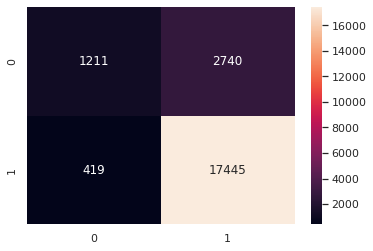

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')

### We see from above confusion matrix that our model has accuracy of 85.6 % and F1-Score of 0.678. It is not good because our data is highly imbalanced. Our model has high accuracy because it computes accuracy of prediction on majority class. After putting our attention to F1-Score, we can understand that our data is poorly at predicting negative class. 

### We also have ROC-AUC score of 0.64. So there is a high chance that the our text classifier model WILL NOT be able to distinguish the positive sentiment class values from the negative sentiment class values.

## 5.4. Model's performance validation for larger original dataset

### Here we use our validation data which was taken from 10% of our steam review dataset.

In [ ]:
review_val.review_text = review_val.review_text.astype('str')
#cleaning(review_val,'review_text')

In [ ]:
X_val = review_val['review_text']
y_val = review_val['review_score']

In [ ]:
y_pred = text_classifier.predict(X_val)

In [ ]:
Confusion_Matrix(y_val,y_pred)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.84      0.98      0.91    524658
          -1       0.68      0.17      0.27    116329

    accuracy                           0.83    640987
   macro avg       0.76      0.58      0.59    640987
weighted avg       0.81      0.83      0.79    640987



TN - True Negative 515337
FP - False Positive 9321
FN - False Negative 96627
TP - True Positive 19702
Accuracy Rate: 0.8347111563885071
Misclassification Rate: 0.1652888436114929
F1-Score: 0.5889402869605957
ROC-AUC 0.5757993079960547


<AxesSubplot:>

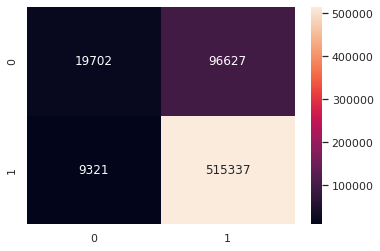

In [ ]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='')

### Same as before, we see from above confusion matrix that our model has accuracy of 83.4% and F1-Score of 0.58. It is not good because our data is highly imbalanced and shows that our text classifier model performed poorly on larger data. 

### We also have ROC-AUC score of 0.57. So there is a high chance that the our text classifier model will not be able to distinguish the positive sentiment class values from the negative sentiment class values on larger data.

## 5.5. Imbalanced Data Classes Handling

### We will use oversampling and undersampling method to handle our imbalanced data.

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as PL

### Then we set our sampling strategy and variables needed in pipeline

In [74]:
strategy1 = {-1:40000}
strategy2 = {1:40000}

vect = CountVectorizer(stop_words= "english",max_features=3000)
tfidf = TfidfTransformer()
over = SMOTE(sampling_strategy=strategy1)
under = RandomUnderSampler(sampling_strategy=strategy2)
# model = RandomForestClassifier()
model = GradientBoostingClassifier()

In [75]:
X = review['review_text'].values
y = review['review_score'].values

In [76]:
Counter(y)

Counter({1: 89326, -1: 19749})

In [77]:
trf = vect.fit(X)
X = trf.transform(X)

In [78]:
steps = [('over', over), ('under', under)]
pipeline = PL(steps=steps)

In [79]:
X_new, y_new = pipeline.fit_resample(X, y)

In [80]:
counter_new = Counter(y_new)
print("Tweet Sentiment Class Proportion after oversampling and undersampling: \n",counter_new)

Tweet Sentiment Class Proportion after oversampling and undersampling: 
 Counter({-1: 40000, 1: 40000})


In [81]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new,random_state = 40,
                                                   test_size = 0.20)

### We prepare our original data (before oversampling and undersampling) as our evaluation data.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)

In [83]:
Counter(y)

Counter({1: 89326, -1: 19749})

### Then we run our pipeline and train the model

In [84]:
pipeline2 = Pipeline([
    ('tfidf', tfidf),
    ('model', model),
    ])

In [86]:
text_classifier2 = pipeline2.fit(X_train2,y_train2)

### Evaluation on original data

In [87]:
predictions2 = text_classifier2.predict(X_test)

In [88]:
Confusion_Matrix(y_test,predictions2)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.92      0.67      0.78     17864
          -1       0.33      0.75      0.46      3951

    accuracy                           0.68     21815
   macro avg       0.63      0.71      0.62     21815
weighted avg       0.82      0.68      0.72     21815



TN - True Negative 11958
FP - False Positive 5906
FN - False Negative 988
TP - True Positive 2963
Accuracy Rate: 0.6839789135915655
Misclassification Rate: 0.31602108640843457
F1-Score: 0.6192439849492715
ROC-AUC 0.7096638393767448


<AxesSubplot:>

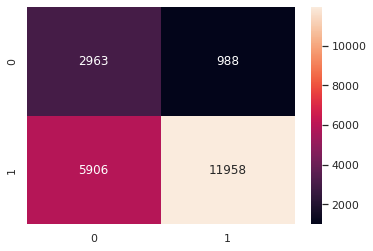

In [89]:
sns.heatmap(confusion_matrix(y_test,predictions2),annot=True,fmt='')

### Now we got better model after training it on oversampling and undersampling data. We got model with accuracy of 88.7% and F1-Score of 0.83.

### We also have ROC-AUC score of 0.9. So there is a high chance that the our text classifier model WILL be able to distinguish the positive sentiment class values from the negative sentiment class values on larger data.